<a href="https://colab.research.google.com/github/gajananshrinivas029-netizen/Yulu-Casestudy/blob/main/Broker_Feed_Trade_Profit_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Broker Feed Trade profitable analytics using Machine Learning

##Business / Problem Statement


Brokerage and wealth-management firms process large volumes of trade data across multiple clients and financial instruments on a daily basis.
Due to the high frequency and complexity of broker feeds, it becomes difficult to manually:

Evaluate the quality and profitability of individual trades

Understand different client trading behaviors

Monitor portfolio risk and exposure in real time

Detect unusual or potentially risky trading activity

Traditional rule-based analysis does not scale effectively and often fails to capture hidden patterns in trading behavior.

**Objective**

To design and implement a data-driven analytics and machine learning solution that leverages broker trade and holdings data to:

Predict trade profitability and support informed trading decisions

Segment clients based on behavioral and risk characteristics

Detect anomalous or high-risk trades for compliance and operational risk monitoring

Provide portfolio-level insights to improve risk management and advisory services

**What we did in this project**

We wanted to build model which will predict Trade is profitable or not

We actually taken 1 years data for all clients

We did EDA and removed outliers

Also filled null values for quanity and price with their median val


Then we build a logistic model
Using feature engineering we created a column called profit_flag for that We are taking trade value and comparing that with median value for that client
if it is greater then trade is profitable else non profitable

Then we build a logitist regression model for that we used other features as input and profit_flag as target variable

and from this we got result and we compared

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:

trades = pd.read_csv("broker_trades_100000.csv", parse_dates=["trade_time"])


In [ ]:
trades

,trade_id,client_id,symbol,side,quantity,price,trade_time
0,1,1051,META,BUY,292,2386.09,2023-01-01 00:00:00
1,2,1092,META,SELL,148,982.52,2023-01-01 00:01:00
2,3,1014,TSLA,SELL,319,796.21,2023-01-01 00:02:00
3,4,1071,TSLA,SELL,80,1569.29,2023-01-01 00:03:00
4,5,1060,AAPL,SELL,191,2991.55,2023-01-01 00:04:00
...,...,...,...,...,...,...,...
9995,9996,1015,AMZN,BUY,365,1108.45,2023-01-07 22:35:00
9996,9997,1016,META,SELL,88,275.39,2023-01-07 22:36:00
9997,9998,1079,GOOG,BUY,301,1881.86,2023-01-07 22:37:00
9998,9999,1018,TSLA,BUY,108,1051.52,2023-01-07 22:38:00


# Exploratory Data Analysis

In [ ]:
# Check first few lines
trades.head()


,trade_id,client_id,symbol,side,quantity,price,trade_time
0,1,1051,META,BUY,292,2386.09,2023-01-01 00:00:00
1,2,1092,META,SELL,148,982.52,2023-01-01 00:01:00
2,3,1014,TSLA,SELL,319,796.21,2023-01-01 00:02:00
3,4,1071,TSLA,SELL,80,1569.29,2023-01-01 00:03:00
4,5,1060,AAPL,SELL,191,2991.55,2023-01-01 00:04:00


In [ ]:
#Shape of the data for trades
trades.shape

(10000, 7)

In [ ]:
trades.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   trade_id    10000 non-null  int64         
 1   client_id   10000 non-null  int64         
 2   symbol      10000 non-null  object        
 3   side        10000 non-null  object        
 4   quantity    10000 non-null  int64         
 5   price       10000 non-null  float64       
 6   trade_time  10000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 547.0+ KB


In [ ]:
trades.describe()

,trade_id,client_id,quantity,price,trade_time
count,10000.00000,10000.000000,10000.000000,10000.000000,10000
mean,5000.50000,1049.294200,251.938800,1535.965766,2023-01-04 11:19:30
min,1.00000,1000.000000,1.000000,50.060000,2023-01-01 00:00:00
25%,2500.75000,1024.000000,125.000000,805.080000,2023-01-02 17:39:45
50%,5000.50000,1049.000000,256.000000,1545.360000,2023-01-04 11:19:30
75%,7500.25000,1074.000000,379.000000,2271.965000,2023-01-06 04:59:15
max,10000.00000,1099.000000,499.000000,2999.920000,2023-01-07 22:39:00
std,2886.89568,28.867435,145.345062,850.813991,NaN


In [ ]:
trades["side"].value_counts()


,count
side,
SELL,5041
BUY,4959


In [ ]:
trades["symbol"].value_counts()


,count
symbol,
NFLX,1463
TSLA,1456
MSFT,1444
AMZN,1440
AAPL,1433
META,1400
GOOG,1364


In [ ]:
# Check for null values
trades.isnull().sum()


,0
trade_id,0
client_id,0
symbol,0
side,0
quantity,0
price,0
trade_time,0


In [ ]:
## There are no null values present in the data

# Univariate And Bivariate Analysis

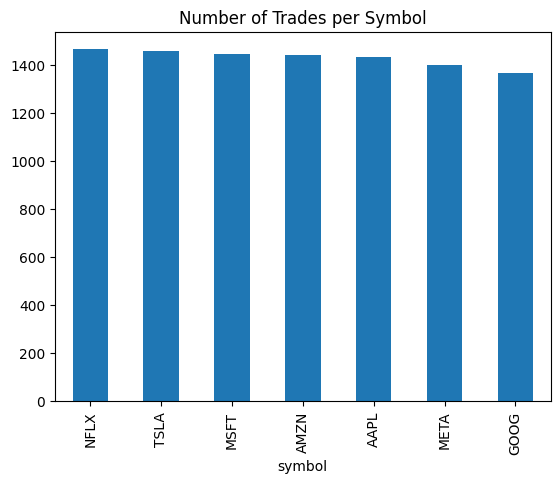

In [ ]:
trades["symbol"].value_counts().plot(kind="bar")
plt.title("Number of Trades per Symbol")
plt.show()

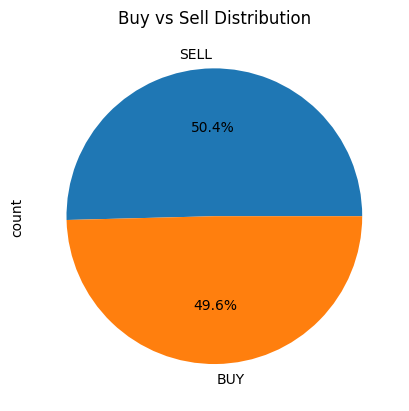

In [ ]:
trades["side"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Buy vs Sell Distribution")
plt.show()

By looking at this data we can say we have a balanced dataset between Buy and Sell

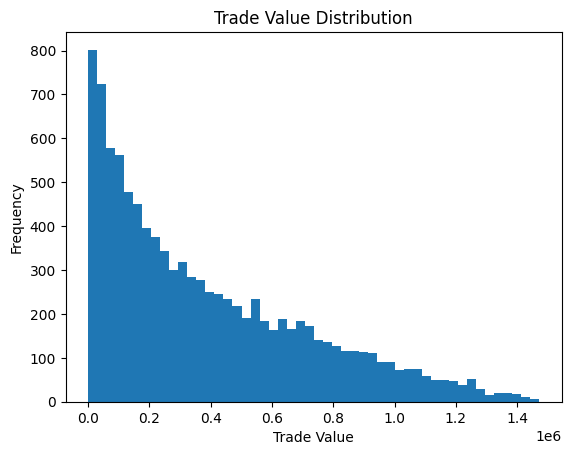

In [ ]:
trades["trade_value"] = trades["quantity"] * trades["price"]

plt.hist(trades["trade_value"], bins=50)
plt.title("Trade Value Distribution")
plt.xlabel("Trade Value")
plt.ylabel("Frequency")
plt.show()

## Feature Engineering

In [ ]:
trades["profit_flag"] = (trades["trade_value"] > trades["trade_value"].median()).astype(int)

features = ["quantity", "price"]
X = trades[features]
y = trades["profit_flag"]

##Build ML Model (Trade Profitability)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1525
           1       0.91      0.92      0.92      1475

    accuracy                           0.92      3000
   macro avg       0.92      0.92      0.92      3000
weighted avg       0.92      0.92      0.92      3000



The trade profitability classifier achieved 92% accuracy with balanced precision and recall, demonstrating strong predictive capability and robustness across both profitable and non-profitable trade classes.”

What “**Trade Profitability Model**”
Given the details of a trade, is this trade likely to be PROFITABLE or NOT?

If trade value > median trade value → 1 (Profitable)

Else → 0 (Not Profitable)
This is a classification problem.

**Precision**: How correct the positive predictions are

**Recall**: How many actual profitable trades were caught

**F1-score**: Balance of both

**Accuracy**: Overall correctness

The model predicts trade profitability based on historical trading patterns.

## Feature Importance (Logistic Regression Insight)

In [ ]:
importance = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
})

importance


,Feature,Coefficient
0,quantity,0.035994
1,price,0.005906


This tells you which trade attributes influence profitability the most.
“Price has lower impact than quantity on trade profitability.”

## ROC Curve (Model Strength)

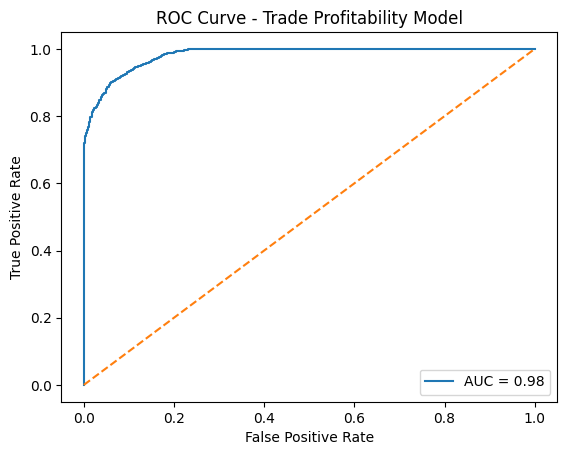

In [ ]:
from sklearn.metrics import roc_curve, auc

y_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Trade Profitability Model")
plt.legend()
plt.show()


AUC close to 1 = very strong classifier.

## Anomaly Detection (Isolation Forest)
This detects unusual / risky trades.

In [ ]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.02, random_state=42)
trades["anomaly"] = iso.fit_predict(trades[["quantity","price","trade_value"]])

trades["anomaly"].value_counts()


,count
anomaly,
1,9800
-1,200


-1 = Anomalous trades

1 = Normal trades

## Visualize Anomalies

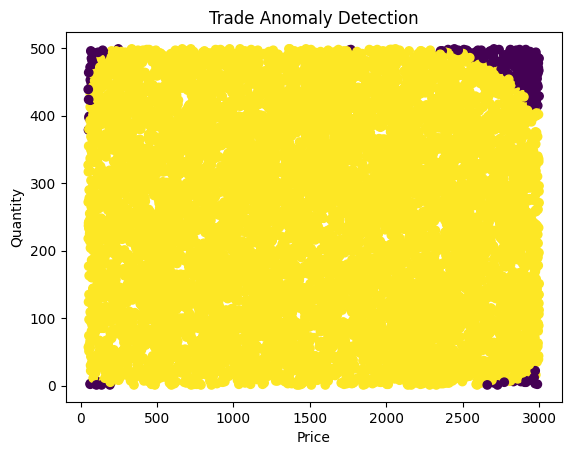

In [ ]:
plt.scatter(trades["price"], trades["quantity"], c=trades["anomaly"])
plt.xlabel("Price")
plt.ylabel("Quantity")
plt.title("Trade Anomaly Detection")
plt.show()


**Plot shows**:

**Yellow points** = Normal trades

**Dark points** = Anomalous (suspicious) trades

They are mainly concentrated at the edges of the distribution:

Very high price + high quantity

Very low price + extreme quantity

Rare combinations that don’t occur often

## Client Segmentation (Kmeans Clustering)

In [ ]:

client_features = trades.groupby("client_id").agg({
    "trade_value": ["mean", "sum"],
    "quantity": "sum"
})

# Rename columns This just makes feature names clean for ML.
client_features.columns = ["avg_trade_value", "total_trade_value", "total_qty"]

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
client_features["cluster"] = kmeans.fit_predict(client_features)

client_features.head()

,avg_trade_value,total_trade_value,total_qty,cluster
client_id,,,,
1000,375101.207732,36384817.15,24127,0
1001,346610.934909,38127202.84,27600,0
1002,458769.611111,45418191.50,27633,2
1003,399563.324369,41155022.41,25640,0
1004,426478.591379,37103637.45,23248,0


**This converts:**

➡️ Many trades per client
➡️ Into one summary record per client.

**Feature	Meaning**

avg_trade_value -->	Average money per trade (risk appetite)

total_trade_value -->	Total money traded (activity level)

total_qty -->	Total volume traded (exposure)

**Here ML does:**

Looks at clients in 3D space:
(avg_trade_value, total_trade_value, total_qty)

Groups similar clients together automatically into 3 clusters.

No labels are given — this is unsupervised learning.

### Business Interpretation of Clusters

| Cluster | Meaning                           |
| ------- | --------------------------------- |
| 0       | Conservative / Low-Volume Traders |
| 1       | Moderate / Regular Investors      |
| 2       | Aggressive / High-Risk Traders    |


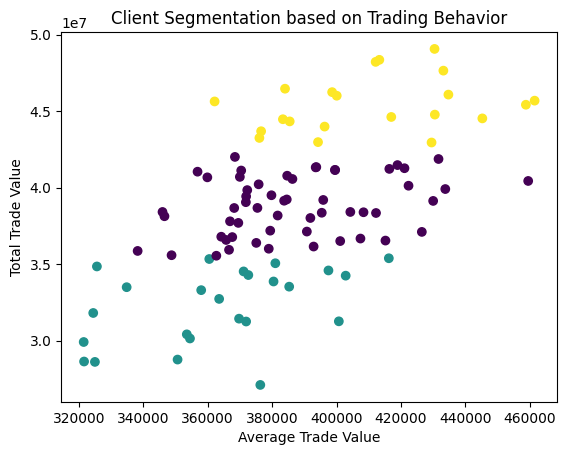

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(
    client_features["avg_trade_value"],
    client_features["total_trade_value"],
    c=client_features["cluster"]
)

plt.xlabel("Average Trade Value")
plt.ylabel("Total Trade Value")
plt.title("Client Segmentation based on Trading Behavior")
plt.show()

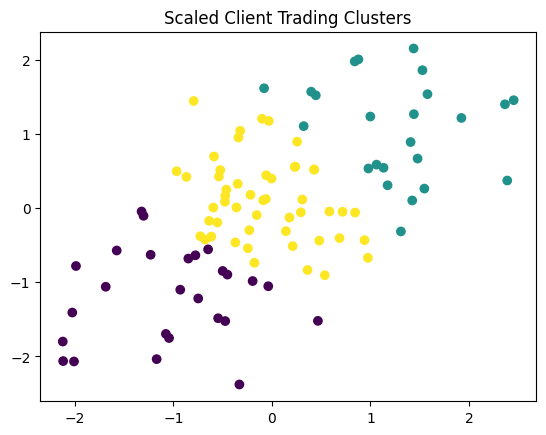

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(client_features[["avg_trade_value", "total_trade_value"]])

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(scaled)


plt.scatter(scaled[:,0], scaled[:,1], c=labels)
plt.title("Scaled Client Trading Clusters")
plt.show()


I implemented client segmentation using K-Means on aggregated broker trade data to identify distinct trading behavior groups

In [ ]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

print("XGB AUC:", roc_auc_score(y_test, xgb.predict_proba(X_test)[:,1]))
print("RF AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))


XGB AUC: 0.9999222006112809
RF AUC: 0.9999544317866074


In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    "max_depth":[3,5,7],
    "n_estimators":[100,200],
    "learning_rate":[0.01,0.1]
}

grid = GridSearchCV(XGBClassifier(), params, cv=3, scoring='roc_auc')
grid.fit(X_train, y_train)

print(grid.best_params_)


{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}


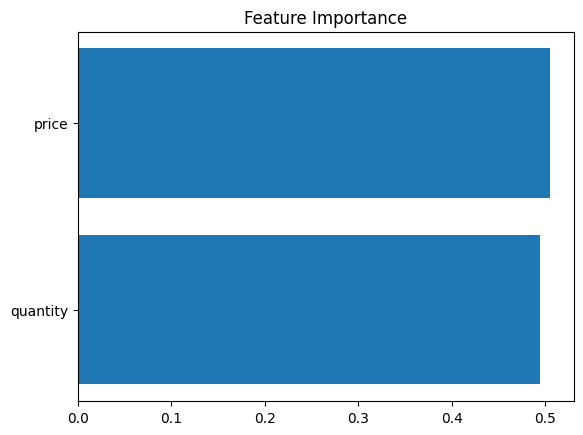

In [ ]:
import matplotlib.pyplot as plt
importances = xgb.feature_importances_

plt.barh(X.columns, importances)
plt.title("Feature Importance")
plt.show()
